# Wine 데이터 셋으로 PCA 적용하기

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

# PCA변환

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [15]:
wine_pca = pca.fit_transform(wine_std)
wine_pca_df = pd.DataFrame(wine_pca, columns=['PC1','PC2','PC3','PC4'])
wine_pca_df['target'] = wine.target
wine_pca_df.head()
# 설명력을 높이기 위해 pc값 많이 넣어라.
# 시각화는 compnents=2

PC1       PC2       PC3       PC4  target
0  3.316751 -1.443463 -0.165739 -0.215631       0
1  2.209465  0.333393 -2.026457 -0.291358       0
2  2.516740 -1.031151  0.982819  0.724902       0
3  3.757066 -2.756372 -0.176192  0.567983       0
4  1.008908 -0.869831  2.026688 -0.409766       0

In [16]:
pca.explained_variance_ratio_
# 첫번쨰 성분은 데이터를 설명하는데 있어 36% 설명, 두번째 성분은 데이터를 설명하는데 있어 19%
# 약 55%로의 설명력을 갖고 있다.

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

## 시각화

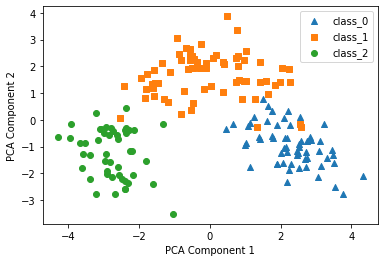

In [12]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = wine_pca_df[wine_pca_df.target == i]['PC1']
    y_axis_data = wine_pca_df[wine_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()